# Sayısal Yöntemler Ödev 1 
### Cagri Gokpunar

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Soru 1:

##### Fonksiyonun Grafiği

$$f\left(x\right)=e^{-2x}x+xcos\left(x\right)-4sin\left(2x\right)$$

Text(0.5, 1.0, 'f(x) graph [0,2]')

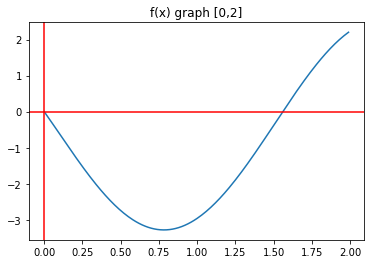

In [3]:
x=np.arange(0,2,0.01)
fx=np.exp(-2*x)*x+x*np.cos(x)-4*np.sin(2*x) #fonksiyonu tanımladık
plt.plot(x,fx) #fonksiyonun grafiği
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("f(x) graph [0,2]")

### 1.a. İkiye Ayırma (Bisection) Yöntemi

In [4]:
a=1
b=2
c=(a+b)/2

##### x=c doğrusu grafik üzerinde

Text(0.5, 1.0, 'x=a, x=b and x=c')

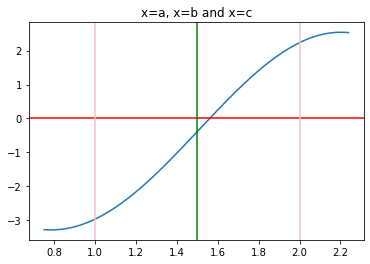

In [5]:
x=np.arange(0.75,2.25,0.01)
fx=np.exp(-2*x)*x+x*np.cos(x)-4*np.sin(2*x)
plt.plot(x,fx)
plt.axhline(y=0, color="red")
plt.axvline(x=a, color="pink") 
plt.axvline(x=b, color="pink") #x=a ve x=b pembe
plt.axvline(x=c, color="green") #c doğrumuz yeşil
plt.title("x=a, x=b and x=c")

$$f\left(x\right)=e^{-2x}x+xcos\left(x\right)-4sin\left(2x\right)$$
Soru 1'de verilen fonksiyonu equation1 şeklinde tanımlıyoruz:

In [6]:
equation1 = lambda x: np.exp(-2*x)*x+x*np.cos(x)-4*np.sin(2*x) #yaklaşık değerini bulacağımız fonksiyon

Orta noktayı fonksiyona yazdığımızda karşımıza çıkan değer f(c):

In [7]:
equation1(c)

-0.3836936271861186

İkiye bölme yöntemi için __bisection__ adında bir fonksiyon tanımlıyoruz.<br>Fonksiyonun üç adet parametresi var: 

(1) Sol sınır: left_bound<br>(2) Sağ sınır: right_bound<br>(3) Eğri: equation  

Fonksiyon parametreleri aldıktan sonra sağ ve sol sınırı toplayıp ikiye bölerek bir orta nokta oluşturuyor.<br>Ardından bu orta noktayı denklemin içine yazarak toleranstan büyük olup olmadığını kontrol ediyor.<br>Eğer büyükse, kökün orta noktanın hangi tarafında olduğunu bulup orta noktayı sağ ya da sol sınırla değiştiriyor.<br>İstenen koşul sağlanana kadar döngüye devam ediyor.

In [8]:
def bisection(left_bound, right_bound, equation):
    middle_point=(left_bound+right_bound)/2
    yield equation(middle_point),middle_point #orta noktayı tanımladık
    while np.absolute(equation(middle_point))>0.00001:
        if equation(left_bound)*equation(middle_point)>0: #şartımız sağlanmadığı takdirde yeni orta nokta
            left_bound=middle_point
        else:
            right_bound=middle_point
        middle_point=(left_bound+right_bound)/2
        yield equation(middle_point),middle_point #yield her while döngüsünde elde ettiğimiz değeri tutmaya yarıyor

    bisection(1,2,equation1)  
Fonksiyona parametreleri girdikten sonra sonucu data frame şeklinde alabiliriz:

In [9]:
question1aValues=pd.DataFrame(bisection(1,2,equation1), columns=["f(c) for each iteration","c"])
question1aValues

,f(c) for each iteration,c
0,-0.383694,1.500000
1,1.144048,1.750000
2,0.407751,1.625000
3,0.015247,1.562500
4,-0.183884,1.531250
5,-0.084175,1.546875
6,-0.034421,1.554688
7,-0.009576,1.558594
8,0.002839,1.560547
9,-0.003368,1.559570


##### x=c doğrusunun değişimi

Tablodaki bazı değerleri grafik üzerinde gösterirsek:<br>
(Her aşamada çizginin tonunun koyulaştığına dikkat ediniz)

Text(0.5, 1.0, 'Change of x=c')

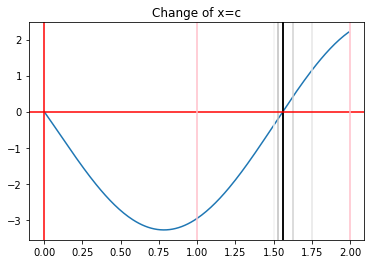

In [10]:
x=np.arange(0,2,0.01)
fx=np.exp(-2*x)*x+x*np.cos(x)-4*np.sin(2*x)
plt.plot(x,fx)
plt.axvline(x=c, color="0.95")
plt.axvline(x=1.75, color="0.9")
plt.axvline(x=1.625, color="0.82")
plt.axvline(x=1.531250, color="0.75")
plt.axvline(x=1.560547, color="0.5")
plt.axvline(x=1.560303, color="0.1")
plt.axvline(x=1.560101, color="black")
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red")
plt.axvline(x=a, color="pink") 
plt.axvline(x=b, color="pink")
plt.title("Change of x=c")

##### c'nin değişim grafiği:

Text(0.5, 1.0, "Change of 'c' through iterations")

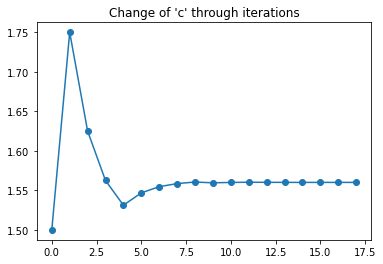

In [11]:
plt.plot(question1aValues["c"], marker="o")
plt.title("Change of 'c' through iterations")

### 1.b. Regula Falsi Yöntemi

Text(0.5, 1.0, 'Line on (f(a),f(b))')

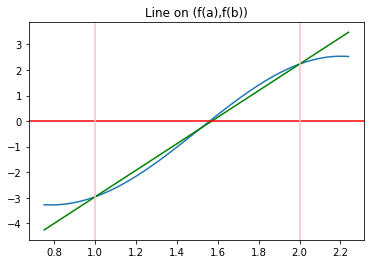

In [12]:
x=np.arange(0.75,2.25,0.01)
fx=np.exp(-2*x)*x+x*np.cos(x)-4*np.sin(2*x)
gx=((equation1(b)-equation1(a))/(b-a))*(x-b)+equation1(b) #g(x)=(f(b)-f(a))*(x-b)+f(b) doğrumuz yeşil
plt.plot(x,fx)
plt.plot(x,gx, color="green")
plt.axhline(y=0, color="red")
plt.axvline(x=a, color="pink") 
plt.axvline(x=b, color="pink") #x=a ve x=b pembe
plt.title("Line on (f(a),f(b))")

Regula Falsi yöntemi için __regulafalsi__ adında bir fonksiyon tanımlıyoruz.<br>Fonksiyonun üç adet parametresi var: 

(1) Sol sınır: left_bound<br>(2) Sağ sınır: right_bound<br>(3) Eğri: equation  

Fonksiyon parametreleri aldıktan sonra<br>
$$x_\omega = -\frac{af(b) - bf(a)}{f(a)-f(b)}$$
<br>denkleminden yola çıkarak xw'yı hesaplıyor.<br>Eğer |f(xw)| toleranstan büyükse, kökün f(xw)'nın hangi tarafında olduğunu bulup f(xw)yı sağ ya da sol sınırla değiştiriyor.<br>İstenen koşul sağlanana kadar döngüye devam ediyor.

In [13]:
def regulafalsi(left_bound,right_bound,equation):
    xw=-(left_bound*equation(right_bound)-right_bound*equation(left_bound))/(equation(left_bound)-equation(right_bound))
    yield equation(xw),xw
    while np.absolute(equation(xw))>0.00001: #işaret farkından yola çıkarak kökün yönü bulunuyor
        if equation(left_bound)*equation(xw)>0:
            left_bound=xw
        else:
            right_bound=xw
        xw=-(left_bound*equation(right_bound)-right_bound*equation(left_bound))/(equation(left_bound)-equation(right_bound))
        yield equation(xw),xw

    regulafalsi(1,2,equation1)  
Fonksiyona parametreleri girdikten sonra sonucu data frame şeklinde alıyoruz:

In [14]:
question1bValues=pd.DataFrame(regulafalsi(1,2,equation1), columns=["f(xw) for each iteration","xw"])
question1bValues

,f(xw) for each iteration,xw
0,6.464632e-02,1.570286
1,-1.269302e-02,1.558103
2,1.688525e-05,1.560103
3,4.124172e-09,1.560100


##### xw'nın değişim grafiği:

Text(0.5, 1.0, "Change of 'xw' through iterations")

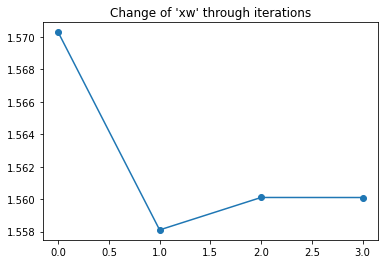

In [15]:
plt.plot(question1bValues["xw"], marker="o")
plt.title("Change of 'xw' through iterations")

### 1.c. Newton-Raphson Yöntemi

$$\frac{d}{dx}f\left(x\right)=-2e^{-2x}x+e^{-2x}+\cos \:\left(x\right)-x\sin \:\left(x\right)-8\cos \:\left(2x\right)$$<br>
Verilen fonksiyonun türevini equation1Derivative olarak tanımlıyoruz:

In [16]:
equation1Derivative = lambda x: -2*np.exp(-2*x)*x+np.exp(-2*x)+np.cos(x)-x*np.sin(x)-8*np.cos(2*x)

##### f(1) noktasında eğriye teğet doğrunun grafiği

Text(0.5, 1.0, 'Tangent on curve at f(1)')

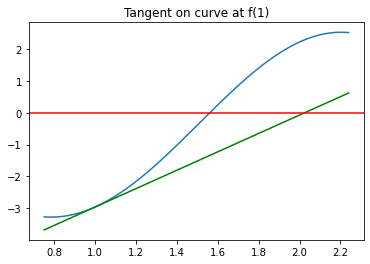

In [17]:
x=np.arange(0.75,2.25,0.01)
fx=np.exp(-2*x)*x+x*np.cos(x)-4*np.sin(2*x)
tangent0=equation1Derivative(1)*(x-1)+equation1(1) #x=1'de fonksiyona teğet doğrumuz yeşil renkte
plt.plot(x,fx)
plt.plot(x,tangent0, color="green")
plt.axhline(y=0, color="red")
plt.title("Tangent on curve at f(1)")

Newton-Raphson yöntemi için __newtonraphson__ adında bir fonksiyon tanımlıyoruz.<br>Fonksiyonun üç adet parametresi var: 

(1) Başlangıç koşulu: xn<br>(2) Eğri: equation<br>(3) Eğrinin türevi: derivative  

Fonksiyon parametreleri aldıktan sonra<br>
$$x_{n+1} = x_n-\frac{f(x_n)}{f'(x_n)}$$
<br>denkleminden yola çıkarak xplus1'ı hesaplıyor. (xn+1'i bu şekilde tanımladık)<br>Döngü koşulumuz sağlanana kadar bulduğumuz yeni değeri eskisinin yerine yazıyoruz. (xn yerine xn+1, xn+1 yerine xn+2... şeklinde)<br>

In [18]:
def newtonraphson(xn,equation,derivative):
    xnplus1=xn-(equation(xn)/derivative(xn)) #formülden
    yield equation(xn),xn
    while np.absolute(equation(xnplus1))>0.00001:
        xnplus1=xnplus1-(equation(xnplus1)/derivative(xnplus1)) #xn yerine xn+1 (xnplus1) yazdık
        yield equation(xnplus1),xnplus1

    newtonraphson(1,equation1,equation1Derivative)  
Fonksiyona parametreleri girdikten sonra sonucu data frame şeklinde alıyoruz:

In [19]:
question1cValues=pd.DataFrame(newtonraphson(1,equation1,equation1Derivative), columns=["f(xn) for each iteration","xn"])
question1cValues

,f(xn) for each iteration,xn
0,-2.961552e+00,1.000000
1,-2.405680e+00,1.148260
2,7.296814e-01,1.677938
3,-2.924897e-02,1.555500
4,-1.566014e-05,1.560098
5,-4.782591e-12,1.560100


##### Teğet doğruların değişimi

Bulduğumuz değerlerden bazılarını kullanarak yeni teğetler oluşturalım:<br>
(Köke yaklaştıkça çizgilerin tonundaki koyulaşmaya dikkat ediniz)

Text(0.5, 1.0, 'Change of tangent lines')

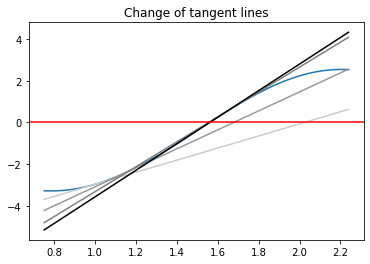

In [20]:
x=np.arange(0.75,2.25,0.01)
fx=np.exp(-2*x)*x+x*np.cos(x)-4*np.sin(2*x)
tangent0=equation1Derivative(1)*(x-1)+equation1(1)
tangent1=equation1Derivative(1.148260)*(x-1.148260)+equation1(1.148260)
tangent2=equation1Derivative(1.677938)*(x-1.677938)+equation1(1.677938)
tangent3=equation1Derivative(1.560100)*(x-1.560100)+equation1(1.560100)
plt.plot(x,fx)
plt.plot(x,tangent0, color="0.8")
plt.plot(x,tangent1, color="0.6")
plt.plot(x,tangent2, color="0.5")
plt.plot(x,tangent3, color="black")
plt.axhline(y=0, color="red")
plt.title("Change of tangent lines")

##### xn değerinin değişimi

Text(0.5, 1.0, "Change of 'xn' through iterations")

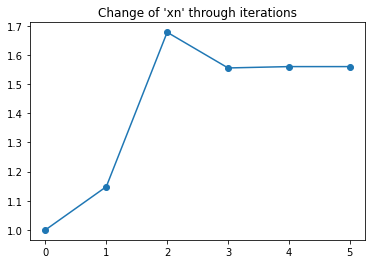

In [21]:
plt.plot(question1cValues["xn"], marker="o")
plt.title("Change of 'xn' through iterations")

In [22]:
equation3 = lambda x: np.sqrt(4*np.exp(-x)+3)

## Soru 2

### 2.a. Fonksiyon Seçimi

İlk fonksiyonumuz:<br>$$x^{3}+\cos(e)$$<br>olsun. Grafiğini inceledikten sonra equation2a olarak tanımlayalım.

Text(0.5, 1.0, 'Function 1')

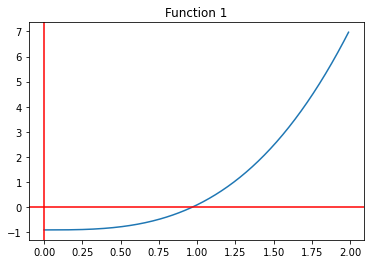

In [23]:
x=np.arange(0,2,0.01)
fx=x**3+np.cos(np.e) #fonksiyonu tanımladık
plt.plot(x,fx) #fonksiyonun grafiği
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 1")

In [24]:
equation2a = lambda x: x**3+np.cos(np.e)

Diğer fonksiyonumuz:<br>$$e^{x}-\left(x-2\right)^{2}-3x$$<br>olsun. Grafiğini inceledikten sonra equation2b olarak tanımlayalım.

Text(0.5, 1.0, 'Function 2')

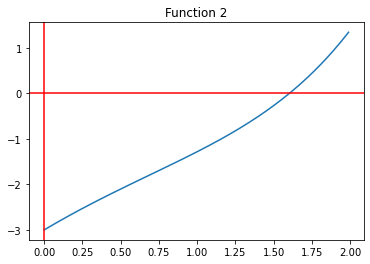

In [25]:
x=np.arange(0,2,0.01)
fx=np.e**x-(x-2)**2-3*(x) #fonksiyonu tanımladık
plt.plot(x,fx) #fonksiyonun grafiği
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 2")

In [26]:
equation2b = lambda x: np.e**x-(x-2)**2-3*(x)

Son fonksiyonumuz ikinci derece polinom olsun:<br>$$-x^{2}+4x-2$$<br>Grafiğini inceledikten sonra equation2c olarak tanımlayalım.

Text(0.5, 1.0, 'Function 3')

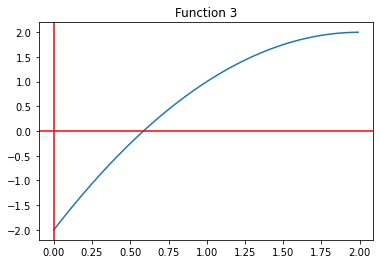

In [27]:
x=np.arange(0,2,0.01)
fx=-(x**2)+4*x-2 #fonksiyonu tanımladık
plt.plot(x,fx) #fonksiyonun grafiği
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 3")

In [28]:
equation2c = lambda x: -(x**2)+4*x-2

### 2.b. Secant ve Müller Yöntemleri

#### Secant Yöntemi:

Secant yöntemi için __secant__ adında bir fonksiyon tanımlıyoruz.<br>Fonksiyonun üç adet parametresi var: 

(1) İlk başlangıç koşulu: xn<br>(2) İkinci başlangıç koşulu: xnminus1<br>(3) Eğri: equation  

Fonksiyon parametreleri aldıktan sonra<br>
$$x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)}{\frac{f\left(x_{n}\right)-f\left(x_{n-1}\right)}{x_{n}-x_{n-1}}}$$
<br>denkleminden yola çıkarak xnplus1'ı hesaplıyor. (xn+1'i bu şekilde tanımladık)<br>Ardından bulduğu xnplus1 ile xnplus2'yu hesaplıyor. (Bunun amacı while döngüsünün içine herhangi bir parametre sokmamak)<br>Döngü koşulumuz sağlanana kadar bulduğumuz yeni değeri eskisinin yerine yazıyoruz. (xn yerine xn+1, xn+1 yerine xn+2... şeklinde)<br>

In [29]:
def secant(xn,xnminus1,equation):
    xnplus1=xn-(equation(xn)/((equation(xn)-equation(xnminus1))/xn-xnminus1))
    xnplus2=xnplus1-(equation(xnplus1)/((equation(xnplus1)-equation(xn))/xnplus1-xn)) #döngüde parametre istemiyoruz
    yield equation(xn),xn
    while np.absolute(equation(xnplus2))!=0:
        xnplus2=xnplus2-(equation(xnplus2)/((equation(xnplus2)-equation(xnplus1))/xnplus2-xnplus1))
        yield equation(xnplus2),xnplus2

##### Birinci fonksiyon (equation2a)

Başlangıç koşulları 0.25 ve 0.5

In [30]:
equation2aValues=pd.DataFrame(secant(0.25,0.5,equation2a), columns=["f(xn) for each iteration","xn"])
equation2aValues

,f(xn) for each iteration,xn
0,-8.961089e-01,0.250000
1,-8.968854e-01,0.245788
2,-6.319942e-01,0.654010
3,1.878732e-01,1.032157
4,-7.264273e-02,0.943198
5,2.975866e-02,0.980104
6,-1.195425e-02,0.965411
7,4.843724e-03,0.971381
8,-1.955996e-03,0.968973
9,7.909666e-04,0.969948


Üç adet kirişi fonksiyon üzerinde görelim:<br>(Köke yaklaştıkça koyulaşıyor)

Text(0.5, 1.0, 'Function 1 (Secant)')

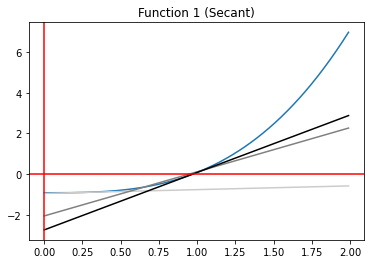

In [31]:
x=np.arange(0,2,0.01)
fx=x**3+np.cos(np.e) #fonksiyonu tanımladık
secant1=((equation2a(0.245788)-equation2a(0.250000))/(0.245788-0.250000))*(x-0.245788)+equation2a(0.245788) #kirişler
secant2=((equation2a(0.654010)-equation2a(1.032157))/(0.654010-1.032157))*(x-0.654010)+equation2a(0.654010)
secant3=((equation2a(0.969675)-equation2a(0.969664))/(0.969675-0.969664))*(x-0.969675)+equation2a(0.969675)
plt.plot(x,fx) #fonksiyonun grafiği
plt.plot(x,secant1, color="0.8")
plt.plot(x,secant2, color="0.5")
plt.plot(x,secant3, color="black")
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 1 (Secant)")

##### İkinci fonksiyon (equation2b)

Başlangıç koşulları 0.25 ve 0.5

In [32]:
equation2bValues=pd.DataFrame(secant(0.25,0.5,equation2b), columns=["f(xn) for each iteration","xn"])
equation2bValues

,f(xn) for each iteration,xn
0,-2.528475e+00,0.250000
1,-8.431002e-01,1.239436
2,-4.416760e-01,1.427636
3,-1.911122e-01,1.530630
4,-7.253193e-02,1.575877
5,-2.580518e-02,1.593132
6,-8.946379e-03,1.599281
7,-3.072623e-03,1.601414
8,-1.051835e-03,1.602146
9,-3.596626e-04,1.602397


Üç adet kirişi fonksiyon üzerinde görelim:<br>(Köke yaklaştıkça koyulaşıyor)

Text(0.5, 1.0, 'Function 2 (Secant)')

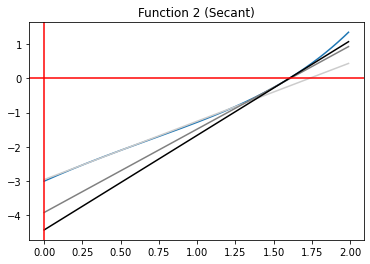

In [33]:
x=np.arange(0,2,0.01)
fx=np.e**x-(x-2)**2-3*(x) #fonksiyonu tanımladık
secant1=((equation2b(1.239436)-equation2b(0.250000))/(1.239436-0.250000))*(x-1.239436)+equation2b(1.239436) #kirişler
secant2=((equation2b(1.530630)-equation2b(1.427636))/(1.530630-1.427636))*(x-1.530630)+equation2b(1.530630)
secant3=((equation2b(1.602526)-equation2b(1.602522))/(1.602526-1.602522))*(x-1.602526)+equation2b(1.602526)
plt.plot(x,fx) #fonksiyonun grafiği
plt.plot(x,secant1, color="0.8")
plt.plot(x,secant2, color="0.5")
plt.plot(x,secant3, color="black")
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 2 (Secant)")

##### Üçüncü fonksiyon (equation2c)

Başlangıç koşulları 0.25 ve 0.5

In [34]:
equation2cValues=pd.DataFrame(secant(0.25,0.5,equation2c), columns=["f(xn) for each iteration","xn"])
equation2cValues

,f(xn) for each iteration,xn
0,-1.062500e+00,0.250000
1,-1.004161e+00,0.266749
2,-2.443573e-01,0.501882
3,-5.578833e-02,0.566198
4,-1.283112e-02,0.581257
5,-2.958811e-03,0.584741
6,-6.827317e-04,0.585545
7,-1.575610e-04,0.585731
8,-3.636322e-05,0.585774
9,-8.392274e-06,0.585783


Üç adet kirişi fonksiyon üzerinde görelim:<br>(Köke yaklaştıkça koyulaşıyor)

Text(0.5, 1.0, 'Function 3 (Secant)')

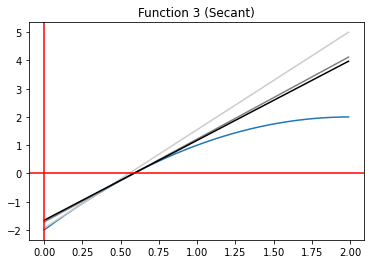

In [35]:
x=np.arange(0,2,0.01)
fx=-(x**2)+4*x-2 #fonksiyonu tanımladık
secant1=((equation2c(0.266749)-equation2c(0.250000))/(0.266749-0.250000))*(x-0.266749)+equation2c(0.266749) #kirişler
secant2=((equation2c(0.566198)-equation2c(0.501882))/(0.566198-0.501882))*(x-0.566198)+equation2c(0.566198)
secant3=((equation2c(0.585783)-equation2c(0.585774))/(0.585783-0.585774))*(x-0.585783)+equation2c(0.585783)
plt.plot(x,fx) #fonksiyonun grafiği
plt.plot(x,secant1, color="0.8")
plt.plot(x,secant2, color="0.5")
plt.plot(x,secant3, color="black")
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 3 (Secant)")

#### Müller Yöntemi:

Secant yöntemi için __muller__ adında bir fonksiyon tanımlıyoruz.<br>Fonksiyonun dört adet parametresi var: 

(1) İlk başlangıç koşulu: point0<br>(2) İkinci başlangıç koşulu: point1<br>(3) Üçüncü başlangıç koşulu: point2<br>(4) Eğri: equation  

Fonksiyon parametreleri aldıktan sonra döngünün içine herhangi bir parametre sokmamak için parametreleri p0, p1... şeklinde yeniden tanımlıyor.<br>Ardından<br>
$$x_{i+1}=x_{i}-\frac{2c}{b\pm\sqrt{b^{2}-4ac}}$$
<br>denkleminden yola çıkarak a, b, c ve p3'ü hesaplıyor. (xi+1'i bu şekilde tanımladık)<br>Döngü koşulumuz sağlanana kadar bulduğumuz yeni değerleri eskisinin yerine yazarak yeni paraboller oluşturmaya devam ediyoruz. (p0 yerine p1, p1 yerine p2... şeklinde)<br>

In [36]:
def muller(point0,point1,point2,equation):
    p0 = point0
    p1 = point1
    p2 = point2
    f0 = equation(point0)
    f1 = equation(point1)
    f2 = equation(point2) #parametreleri değişken olarak tekrar tanımladık
    c = f2
    b = ((p0-p2)**2 *(f1-f2)-(p1-p2)**2 *(f0-f2))/((p0-p2)*(p1-p2)*(p0-p1))
    a = ((p1-p1)*(f0-f2) - (p0-p2)*(f1-f2))/((p0-p2)*(p1-p2)*(p0-p1))
    p3 = p2 - 2*c/(b+(b/np.absolute(b))*np.sqrt(b**2 -4*a*c)) #a b ve c yi hesapladık
    yield equation(p2),p2,p1,p0
    while np.absolute(equation(p3))!=0:
        c = f2
        b = ((p0-p2)**2 *(f1-f2)-(p1-p2)**2 *(f0-f2))/((p0-p2)*(p1-p2)*(p0-p1))
        a = ((p1-p1)*(f0-f2) - (p0-p2)*(f1-f2))/((p0-p2)*(p1-p2)*(p0-p1))
        p3 = p2 - 2*c/(b+(b/np.absolute(b))*np.sqrt(b**2 -4*a*c))
        yield equation(p3),p3,p2,p1
        p0 = p1
        p1 = p2
        p2 = p3
        f0 = equation(p0)
        f1 = equation(p1)
        f2 = equation(p2)
        

##### İlk fonksiyon (equation2a)

Başlangıç koşulları 0.1, 0.25 ve 0.5

In [37]:
equation2aValuesMuller=pd.DataFrame(list(muller(0.1,0.25,0.5,equation2a)), columns=["f(xi+1) for each iteration","xi","xi-1","xi-2"])
equation2aValuesMuller

,f(xi+1) for each iteration,xi,xi-1,xi-2
0,-7.867339e-01,0.500000,0.250000,0.100000
1,-1.336734e-01,0.919753,0.500000,0.250000
2,5.404876e-03,0.971580,0.919753,0.500000
3,-6.027391e-05,0.969646,0.971580,0.919753
4,-2.561270e-08,0.969667,0.969646,0.971580
5,1.200151e-13,0.969667,0.969667,0.969646
6,0.000000e+00,0.969667,0.969667,0.969667


##### İkinci fonksiyon (equation2b)

Başlangıç koşulları 0.1, 0.25 ve 0.5

In [38]:
equation2bValuesMuller=pd.DataFrame(list(muller(0.1,0.25,0.5,equation2b)), columns=["f(xi+1) for each iteration","xi","xi-1","xi-2"])
equation2bValuesMuller

,f(xi+1) for each iteration,xi,xi-1,xi-2
0,-2.101279e+00,0.500000,0.250000,0.100000
1,-1.509815e+00,0.864029,0.500000,0.250000
2,-8.422900e-01,1.239846,0.864029,0.500000
3,-2.514475e-01,1.506772,1.239846,0.864029
4,-2.526283e-02,1.593331,1.506772,1.239846
5,-4.745404e-04,1.602356,1.593331,1.506772
6,-7.717875e-07,1.602527,1.602356,1.593331
7,-2.342482e-11,1.602527,1.602527,1.602356
8,0.000000e+00,1.602527,1.602527,1.602527


##### Üçüncü fonksiyon (equation2c)

Başlangıç koşulları 0.1, 0.25 ve 0.5

In [39]:
equation2cValuesMuller=pd.DataFrame(list(muller(0.1,0.25,0.5,equation2c)), columns=["f(xi+1) for each iteration","xi","xi-1","xi-2"])
equation2cValuesMuller

,f(xi+1) for each iteration,xi,xi-1,xi-2
0,-2.500000e-01,0.500000,0.250000,0.100000
1,-7.773934e-02,0.558563,0.500000,0.250000
2,-7.671061e-03,0.583077,0.558563,0.500000
3,-3.344501e-04,0.585668,0.583077,0.558563
4,-1.613078e-06,0.585786,0.585668,0.583077
5,-3.552003e-10,0.585786,0.585786,0.585668
6,-6.661338e-16,0.585786,0.585786,0.585786
7,0.000000e+00,0.585786,0.585786,0.585786


### Grafik Üzerinde Analiz

İlk 3 parabolü grafik üzerinde görelim.

Parabollerin değişimini görmek için işimizi kolaylaştıracak bir fonksiyon yazalım.<br>
__parabolaFromPoint__ fonksiyonunun 6 adet parametresi var. Sırasıyla noktaların x ve y koordinatlarını alıyor.<br>
Ardından x koordinatlarını katsayılar matrisine atayarak denklemi çözüyor. Çıktı olarak a, b ve c noktalarını veriyor.

In [40]:
def parabolaFromPoint(point1x,point1y,point2x,point2y,point3x,point3y):
    coefficent=np.ones((3,3))
    coefficent[0][0]=point1x**2
    coefficent[0][1]=point1x
    coefficent[1][0]=point2x**2
    coefficent[1][1]=point2x
    coefficent[2][0]=point3x**2
    coefficent[2][1]=point3x
    ordinate=np.array([point1y,point2y,point3y])
    constants=np.linalg.solve(coefficent,ordinate)
    return constants

(1,5), (2,8) ve (12,7) noktalarında deneyelim:

In [41]:
parabolaFromPoint(1,5,2,8,12,7)

array([-0.28181818,  3.84545455,  1.43636364])

Buna göre ikinci dereceden polinomumuz:$$-0.28x^{2}+3.84x+1.43$$


Şimdi fonksiyonlarımızın üzerinde görelim.

##### Birinci fonksiyon (equation2a)

Text(0.5, 1.0, 'Function 1 (Muller)')

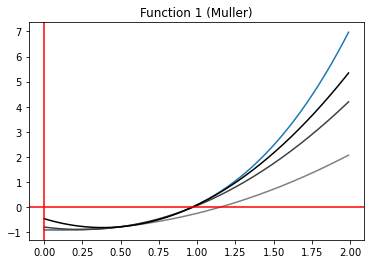

In [42]:
x=np.arange(0,2,0.01)
fx=x**3+np.cos(np.e) #fonksiyonu tanımladık
parabola1points=parabolaFromPoint(0.1,equation2a(0.1),0.25,equation2a(0.25),0.5,equation2a(0.5))
parabola1=(parabola1points[0])*x*x+(parabola1points[1])*x+(parabola1points[2])
parabola2points=parabolaFromPoint(0.25,equation2a(0.25),0.5,equation2a(0.5),0.919753,equation2a(0.919753))
parabola2=(parabola2points[0])*x*x+(parabola2points[1])*x+(parabola2points[2])
parabola3points=parabolaFromPoint(0.5,equation2a(0.5),0.919753,equation2a(0.919753),0.971580,equation2a(0.971580))
parabola3=(parabola3points[0])*x*x+(parabola3points[1])*x+(parabola3points[2]) #bulduğumuz noktaları yerine yazdık
plt.plot(x,fx) #fonksiyonun grafiği
plt.plot(x,parabola1, color="0.5")
plt.plot(x,parabola2, color="0.25")
plt.plot(x,parabola3, color="black")
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 1 (Muller)")

##### İkinci fonksiyon (equation2b)

Text(0.5, 1.0, 'Function 2 (Muller)')

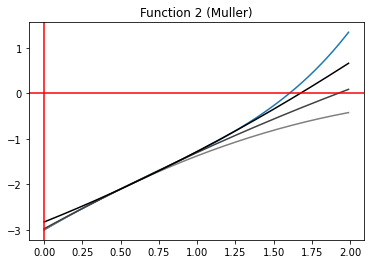

In [43]:
x=np.arange(0,2,0.01)
fx=np.e**x-(x-2)**2-3*(x) #fonksiyonu tanımladık
parabola1points=parabolaFromPoint(0.1,equation2b(0.1),0.25,equation2b(0.25),0.5,equation2b(0.5))
parabola1=(parabola1points[0])*x*x+(parabola1points[1])*x+(parabola1points[2])
parabola2points=parabolaFromPoint(0.25,equation2b(0.25),0.5,equation2b(0.5),0.864029,equation2b(0.864029))
parabola2=(parabola2points[0])*x*x+(parabola2points[1])*x+(parabola2points[2])
parabola3points=parabolaFromPoint(0.5,equation2b(0.5),0.864029,equation2b(0.864029),1.239846,equation2b(1.239846))
parabola3=(parabola3points[0])*x*x+(parabola3points[1])*x+(parabola3points[2]) #bulduğumuz noktaları yerine yazdık
plt.plot(x,fx) #fonksiyonun grafiği
plt.plot(x,parabola1, color="0.5")
plt.plot(x,parabola2, color="0.25")
plt.plot(x,parabola3, color="black")
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 2 (Muller)")

##### Üçüncü fonksiyon (equation2c)

Text(0.5, 1.0, 'Function 3 (Muller)')

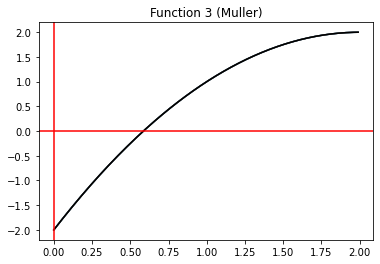

In [44]:
x=np.arange(0,2,0.01)
fx=-(x**2)+4*x-2 #fonksiyonu tanımladık
parabola1points=parabolaFromPoint(0.1,equation2c(0.1),0.25,equation2c(0.25),0.5,equation2c(0.5))
parabola1=(parabola1points[0])*x*x+(parabola1points[1])*x+(parabola1points[2])
parabola2points=parabolaFromPoint(0.25,equation2c(0.25),0.5,equation2c(0.5),0.558563,equation2c(0.558563))
parabola2=(parabola2points[0])*x*x+(parabola2points[1])*x+(parabola2points[2])
parabola3points=parabolaFromPoint(0.5,equation2c(0.5),0.558563,equation2c(0.558563),0.583077,equation2c(0.583077))
parabola3=(parabola3points[0])*x*x+(parabola3points[1])*x+(parabola3points[2]) #bulduğumuz noktaları yerine yazdık
plt.plot(x,fx) #fonksiyonun grafiği
plt.plot(x,parabola1, color="0.5")
plt.plot(x,parabola2, color="0.25")
plt.plot(x,parabola3, color="black")
plt.axvline(x=0, color="red")
plt.axhline(y=0, color="red") #koordinat doğruları
plt.title("Function 3 (Muller)")

Fonksiyonun kendisi de bir parabol olduğu için paraboller ayırt edilemez biçimde.

### 2.c. Yakınsaklık Hızları, İterasyon Sayıları ve CPU Zamanları

$$\left|\varepsilon_{n+1}\right|\le c\left|\varepsilon_{n}\right|^{p}$$<br> formülünden p değerlerini alırsak:

In [45]:
convergenceTable=pd.DataFrame({"Convergence Speed":[1.618,1.839]}, index=["Secant","Muller"])
convergenceTable

,Convergence Speed
Secant,1.618
Muller,1.839


İterasyon sayıları için yukarıdaki tabloları kullanabiliriz:

In [46]:
iterationTable=pd.DataFrame({"Function 1":[41,6],"Function 2":[35,8],"Function 3": [26,7]}, index=["Secant","Muller"])
iterationTable

,Function 1,Function 2,Function 3
Secant,41,35,26
Muller,6,8,7


#### CPU Zamanları

CPU zamanlarını hesaplamak için fonksiyonlarımızı 10 milyon kere çalıştırıp ortalama çalışma sürelerini bulalım.

##### Secant

In [47]:
%%timeit -n 10000000
secant(0.25,0.5,equation2a)

344 ns ± 18.9 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [48]:
%%timeit -n 10000000
secant(0.25,0.5,equation2b)

311 ns ± 9.24 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [49]:
%%timeit -n 10000000
secant(0.25,0.5,equation2c)

303 ns ± 5.63 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


##### Müller

In [50]:
%%timeit -n 10000000
muller(0.1,0.25,0.5,equation2a)

328 ns ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [51]:
%%timeit -n 10000000
muller(0.1,0.25,0.5,equation2b)

347 ns ± 11.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [52]:
%%timeit -n 10000000
muller(0.1,0.25,0.5,equation2c)

369 ns ± 33.6 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Tabloda görelim:

In [53]:
cpuTable=pd.DataFrame({"Function 1":[276,288],"Function 2":[276,284],"Function 3": [283,301]}, index=["Secant","Muller"])
cpuTable

,Function 1,Function 2,Function 3
Secant,276,276,283
Muller,288,284,301


Tabloları birleştirelim:<br>
(F1: Function 1,
 F2: Function 2,
 F3: Function 3)

In [54]:
prefinalTable=pd.concat([convergenceTable,iterationTable], axis=1).rename(columns={"Function 1":"F1 Iterations", 
                                                                                   "Function 2":"F2 Iterations",
                                                                                   "Function 3":"F3 Iterations"})
finalTable=pd.concat([prefinalTable,cpuTable], axis=1).rename(columns={"Function 1":"F1 CPU Time", 
                                                                       "Function 2":"F2 CPU Time",
                                                                       "Function 3":"F3 CPU Time"})
finalTable

,Convergence Speed,F1 Iterations,F2 Iterations,F3 Iterations,F1 CPU Time,F2 CPU Time,F3 CPU Time
Secant,1.618,41,35,26,276,276,283
Muller,1.839,6,8,7,288,284,301


İterasyon sayılarında büyük fark olmasına rağmen işlemci süreleri birbirine çok yakın ve Secant yöntemi nispeten daha hızlı. Müller yönteminin daha yorucu olduğu söylenebilir.